# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data

In [2]:
path = r'C:\Users\Max\Desktop\PSU\Practice\Данные_ниже_паркера.xlsx'
data = pd.read_excel(path, 1)

# Define feature and target columns
x_columns = ['Глубина, м', 'Барометрия, закачка, МПа', 
       'Термометрия, закачка, МПа', 'Термометрия, статика, МПа',
       'Расходометрия, об/мин', 'Перфорация']

# Both targets
y_columns = ['Степень сухости пара, %', 'Удельная энтальпия, кДж/кг']

# Each target
y_1 = ['Степень сухости пара, %']
y_2 = ['Удельная энтальпия, кДж/кг']

# Plot scatter

In [3]:
def scatter_plot(data, x_column_name, y_column_name, x_label, y_label, title):
    # Define x and y data
    x = data[x_column_name].copy()
    y = data[y_column_name].copy()
    
    # Plot scatter
    plt.figure(figsize=(15, 7))
    plt.plot(x, y, 'o', color ='blue')
    
    # Make format output
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Linear regression model

In [4]:
def make_regression(df, x_list, y_list):
    model_data = df.copy()
    
    X = model_data[x_list].values
    y = model_data[y_list].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    pickle.dump(reg,open('model1.pkl','wb'))
    y_predict = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predict)
    
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

# Main part

### 1. Plot scatter for each pipe before predictions

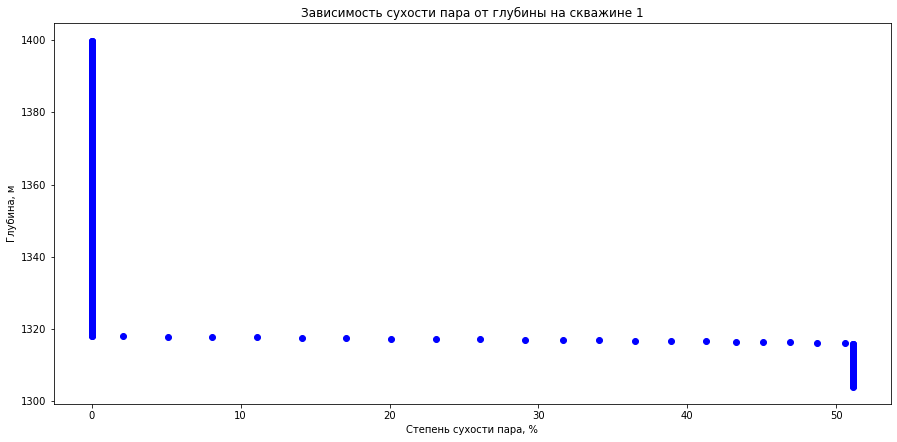

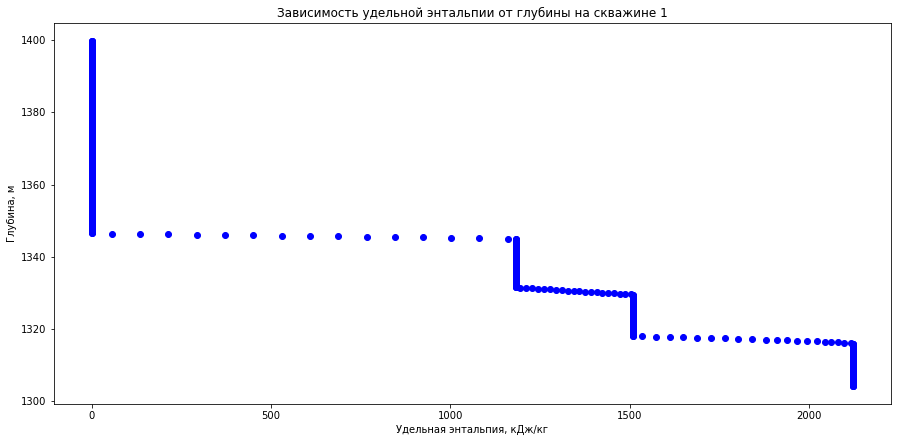

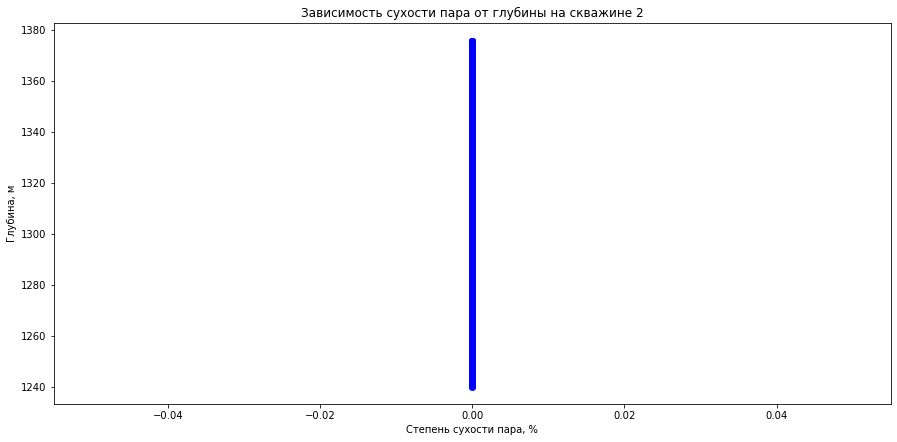

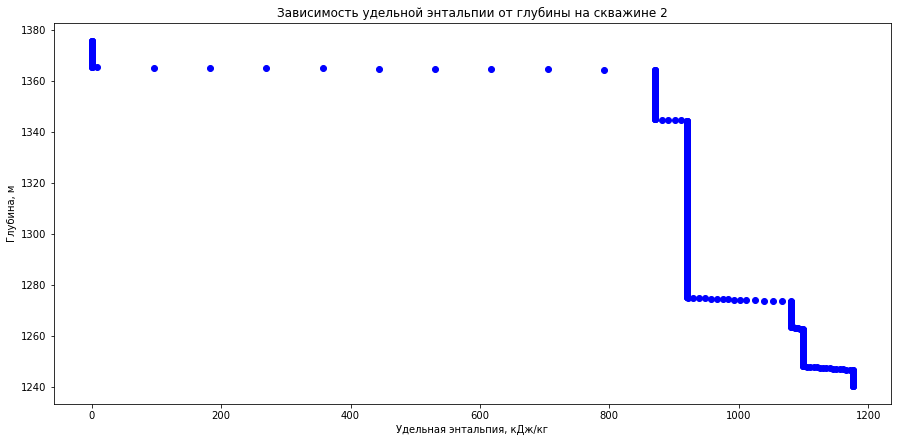

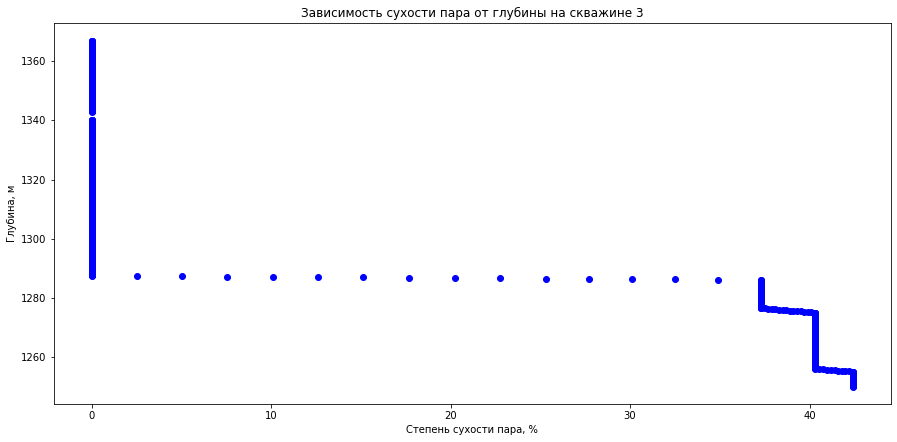

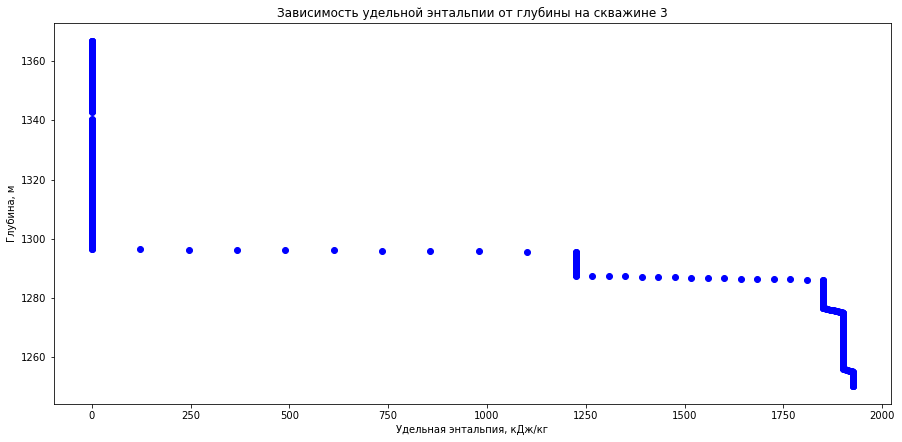

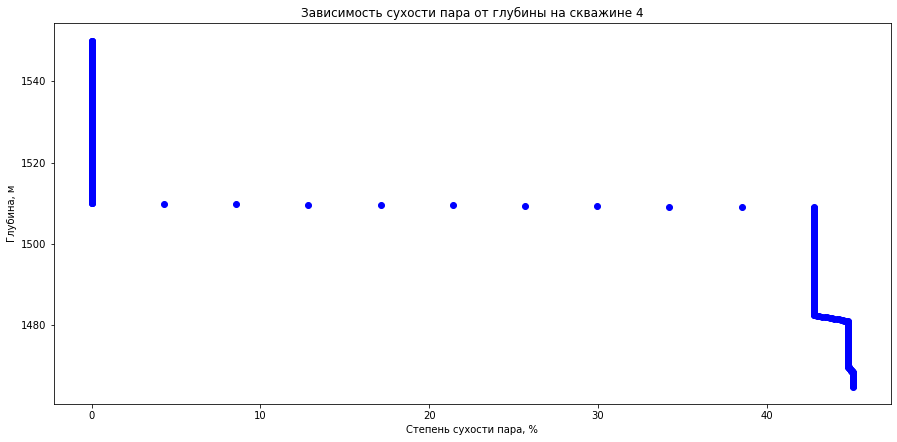

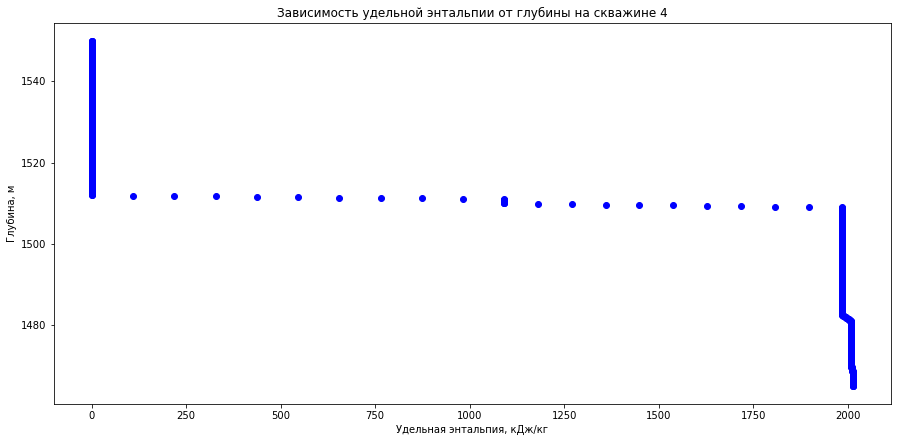

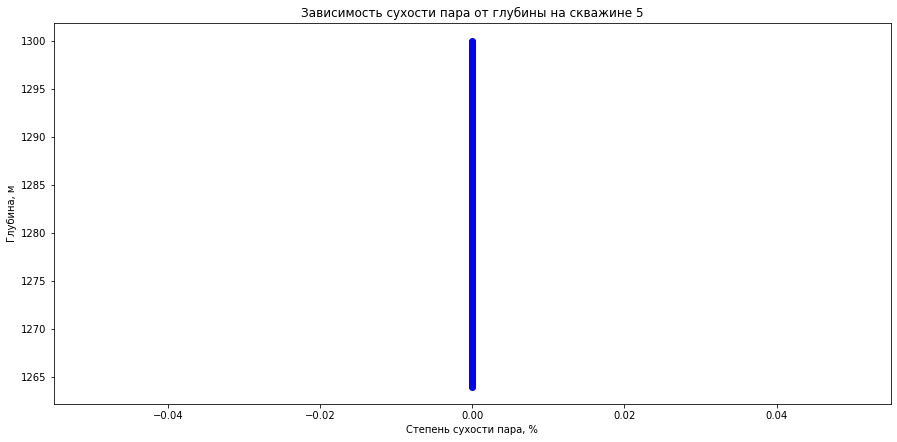

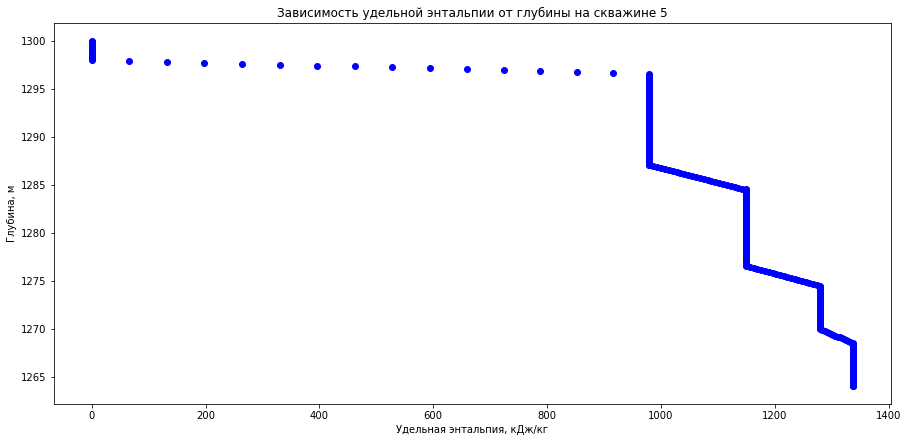

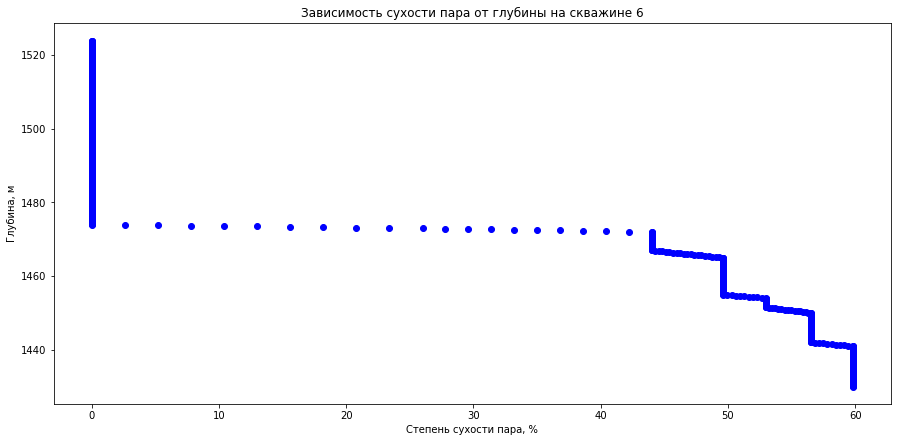

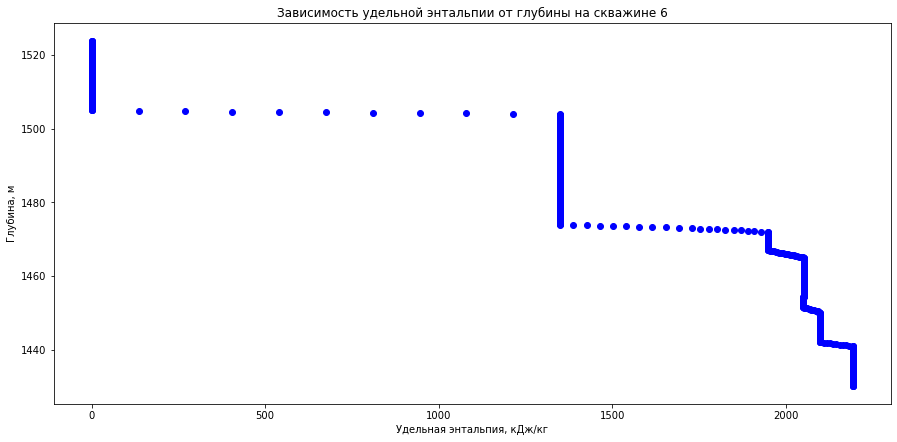

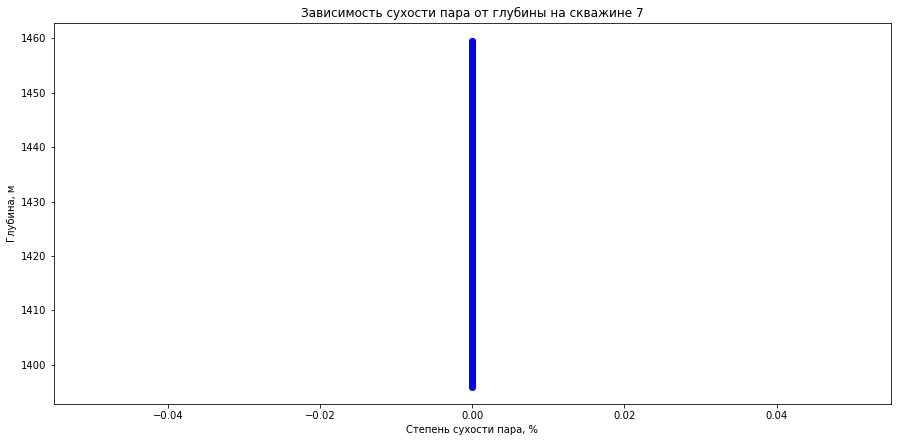

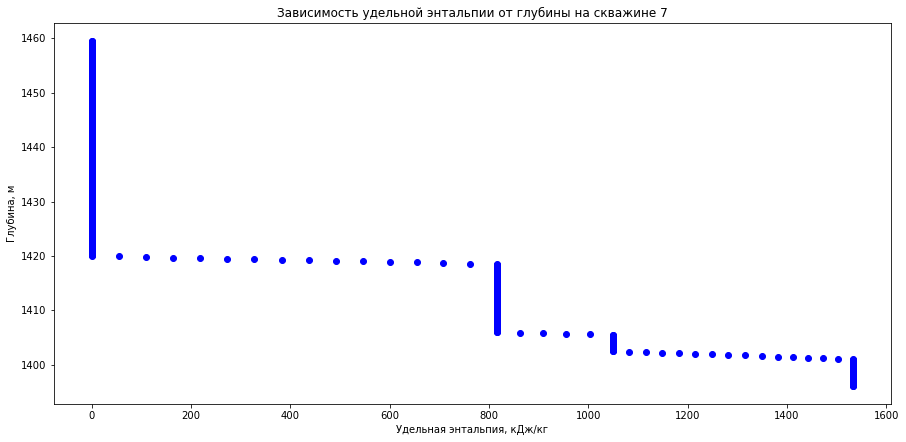

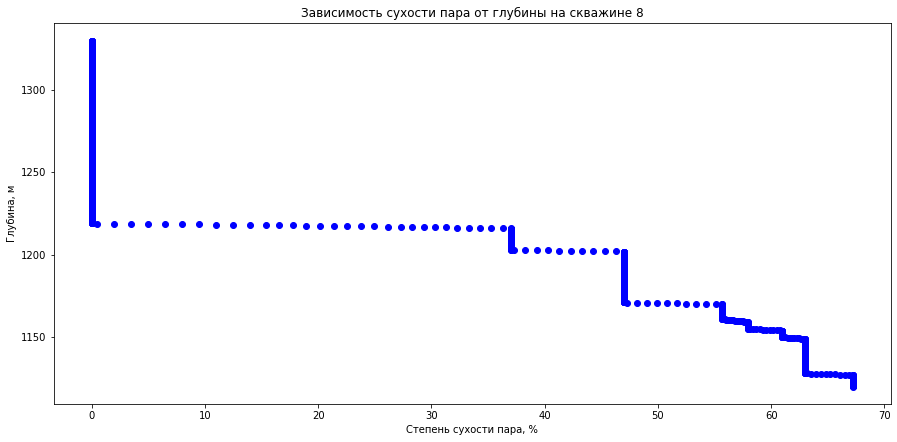

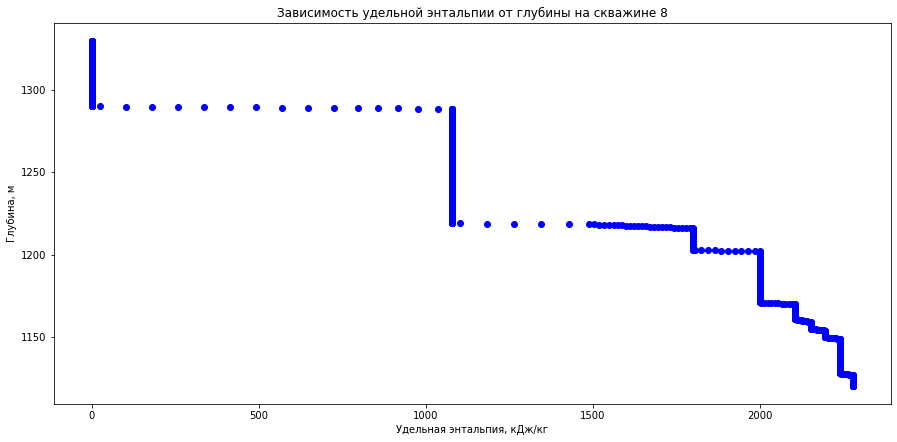

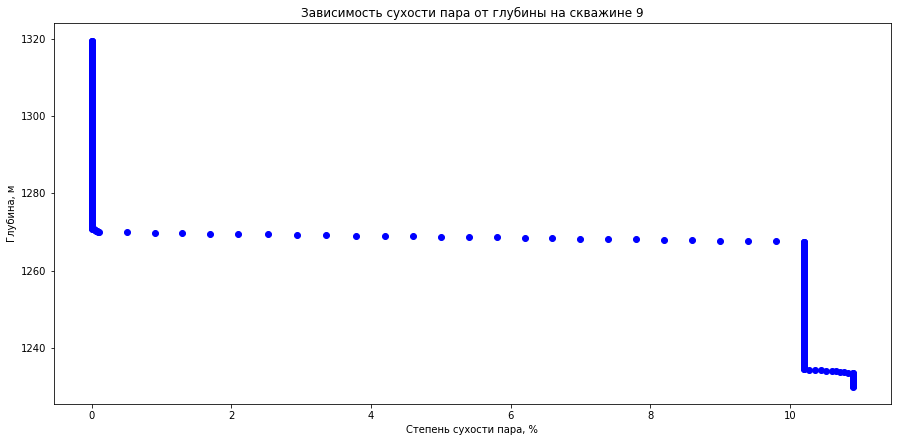

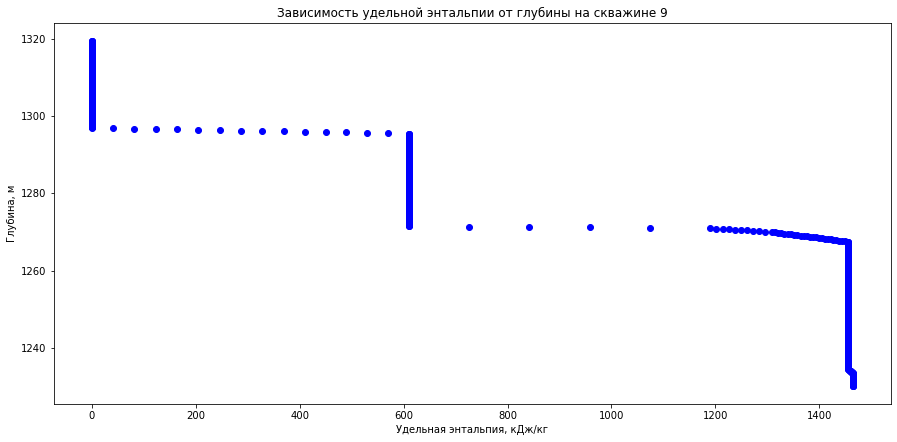

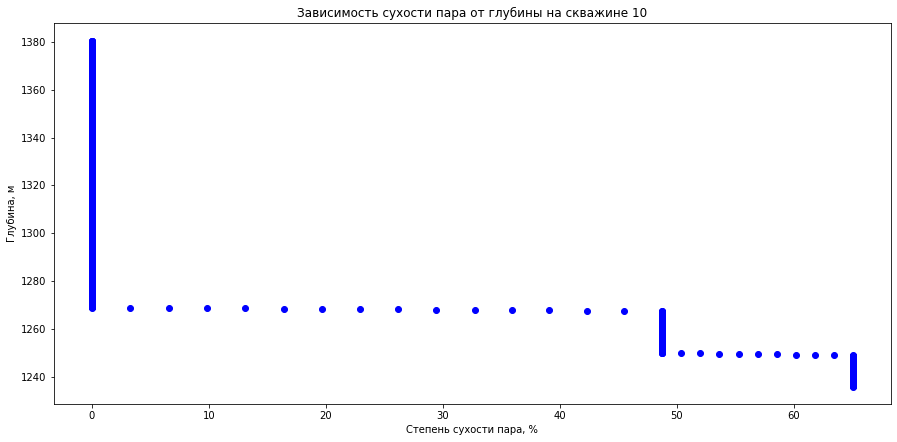

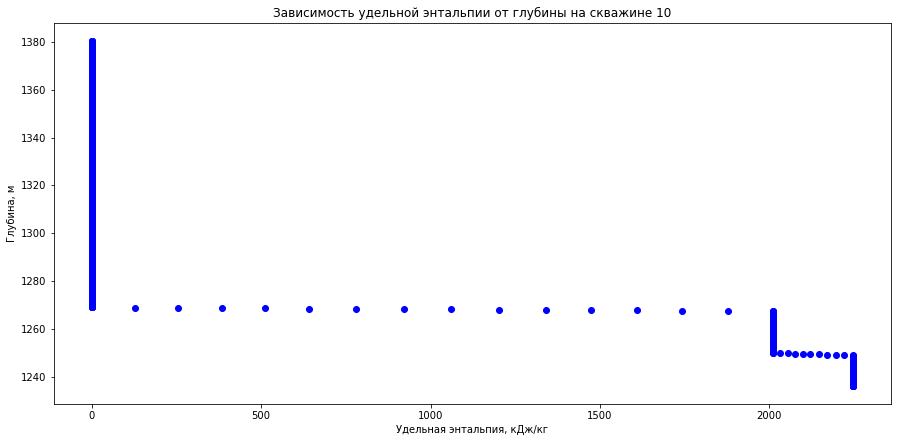

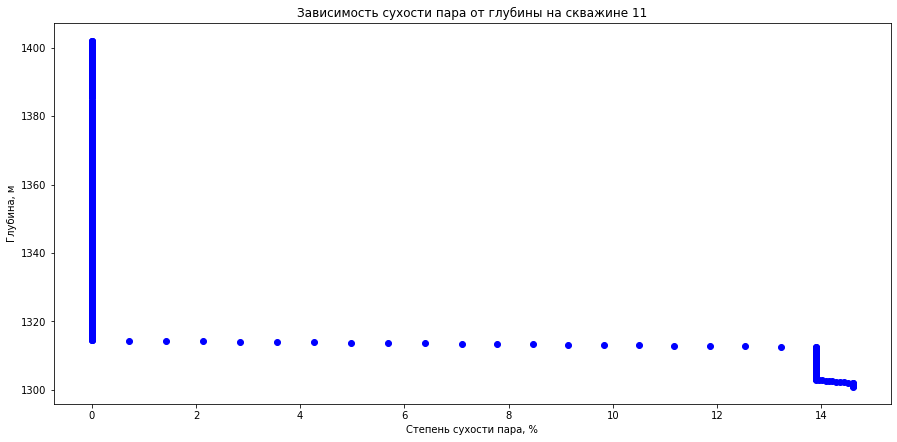

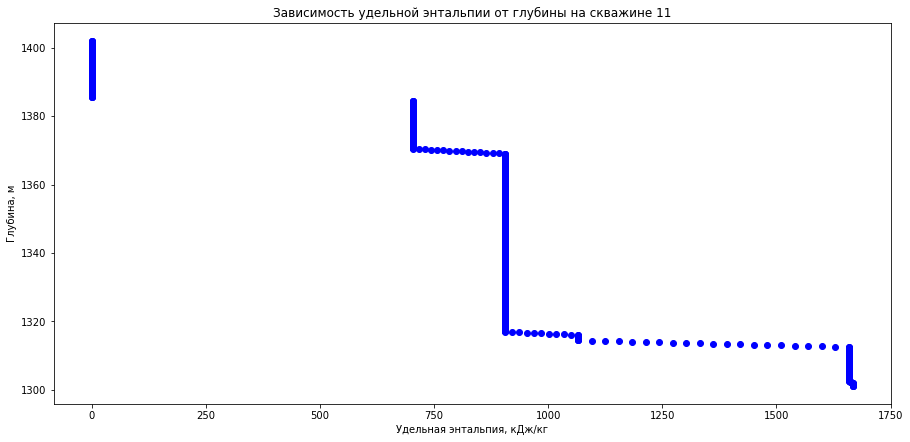

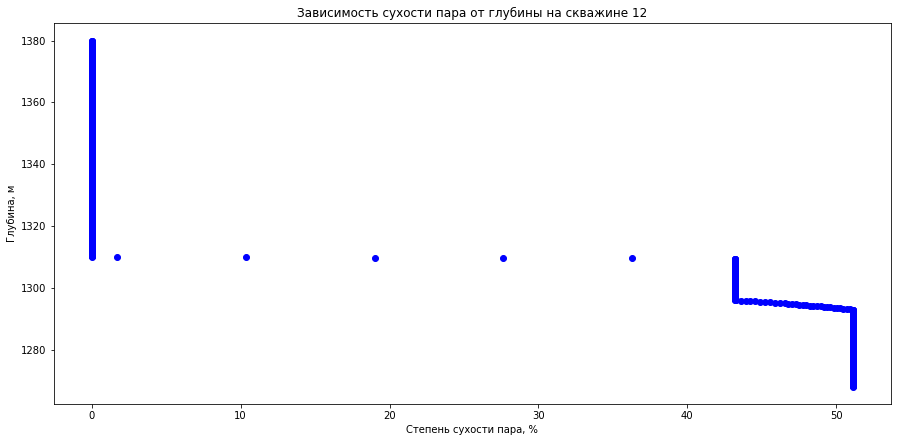

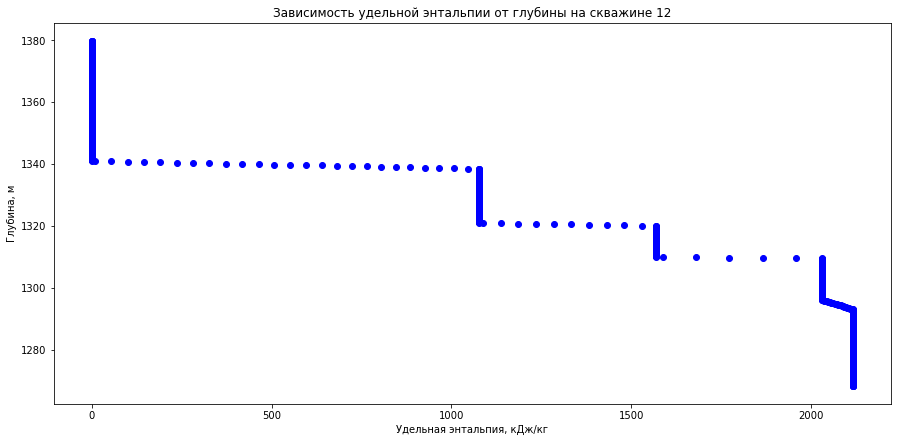

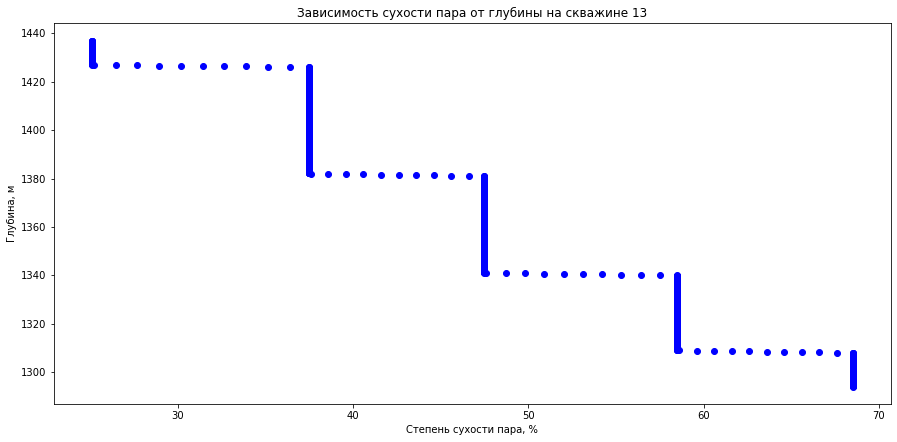

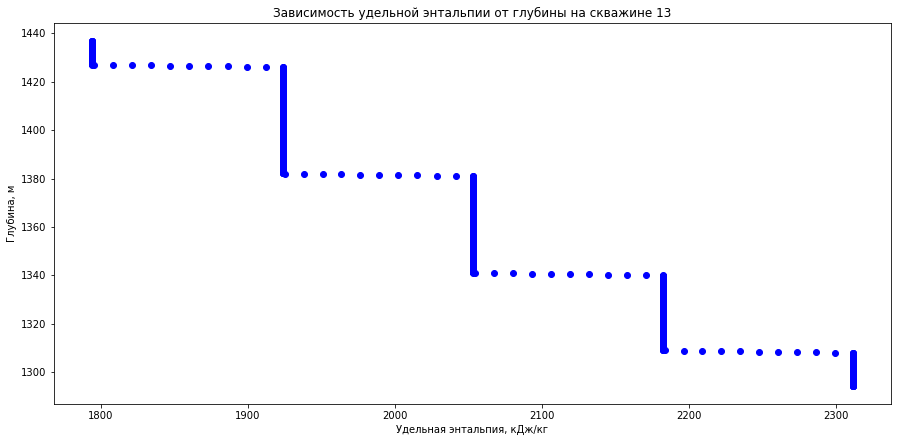

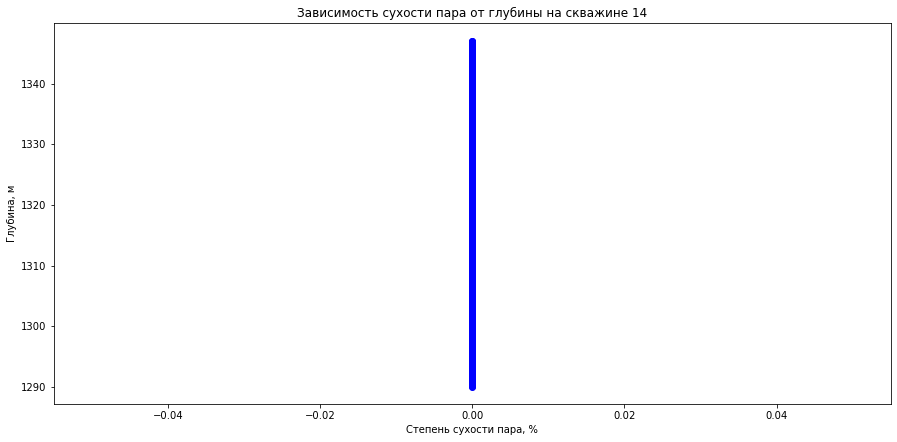

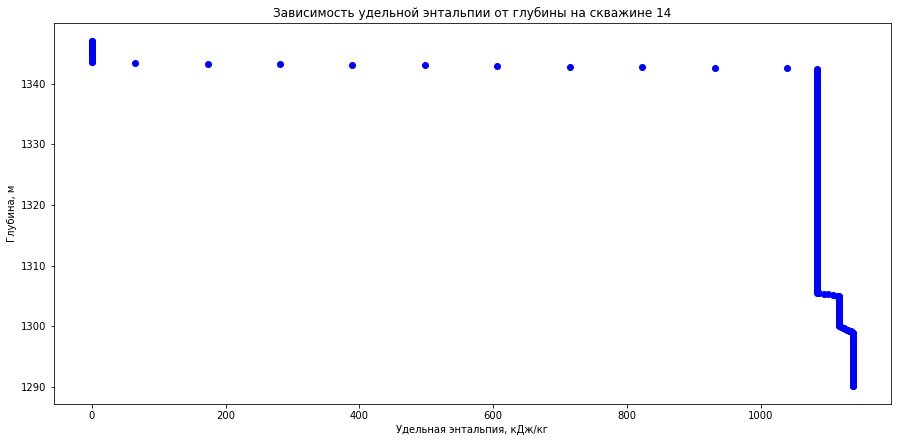

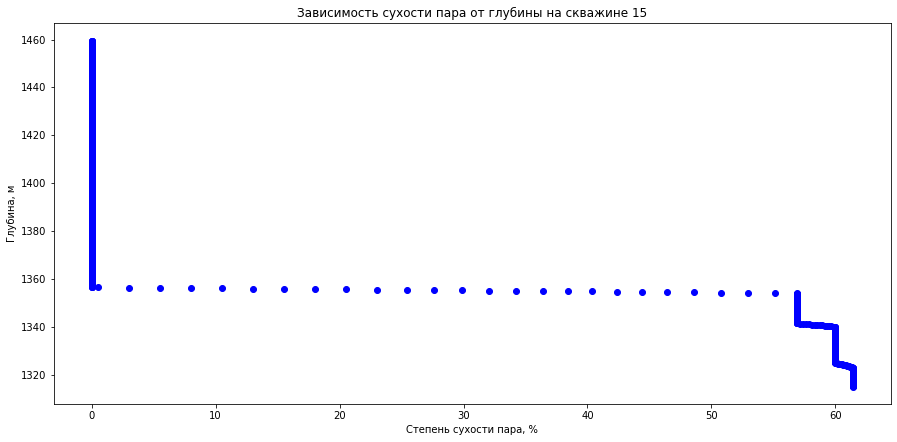

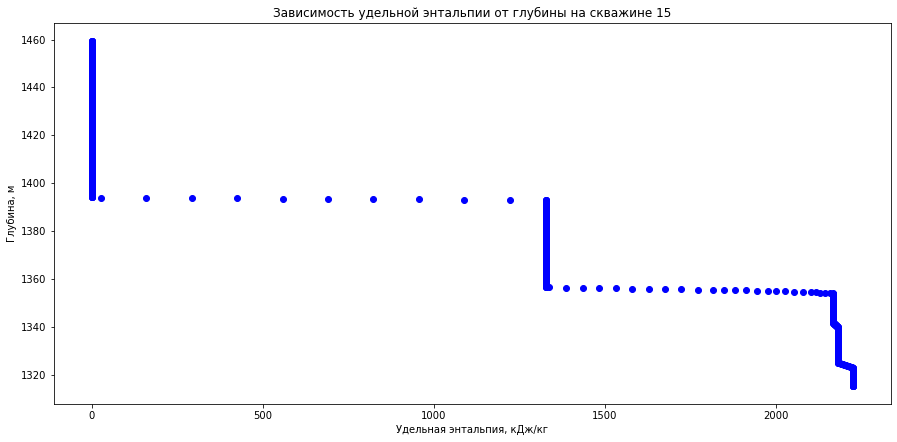

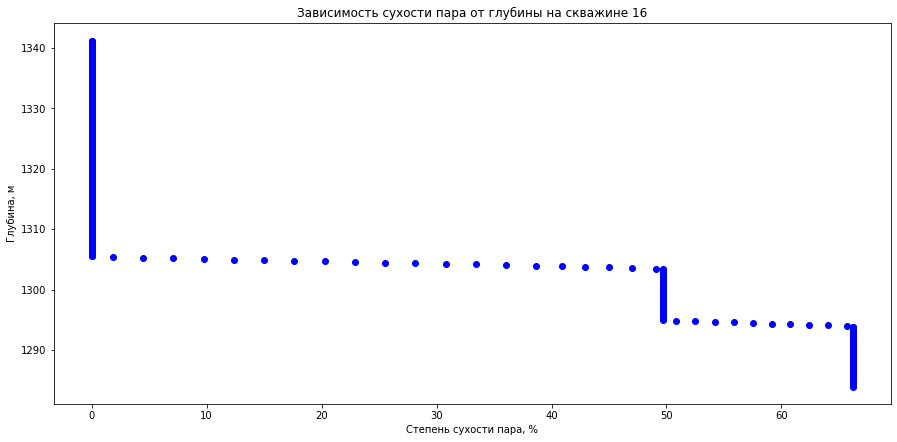

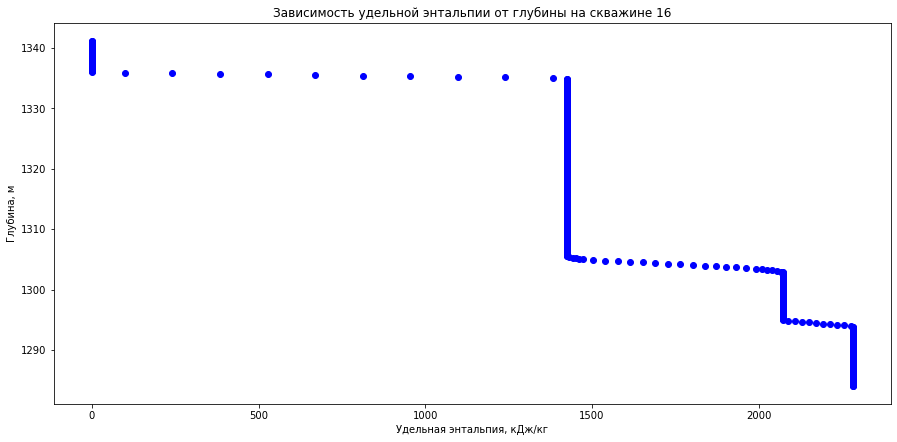

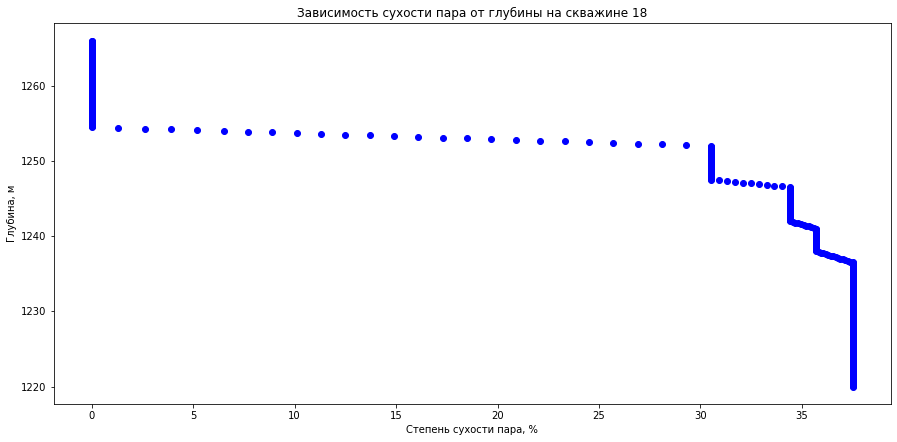

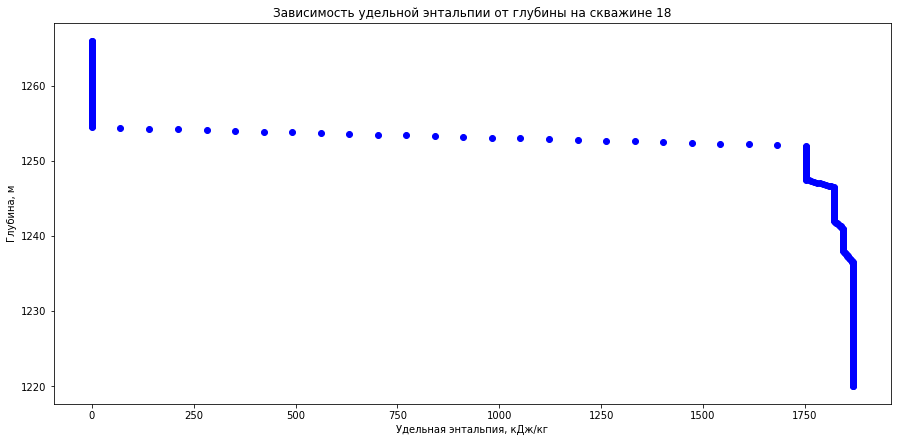

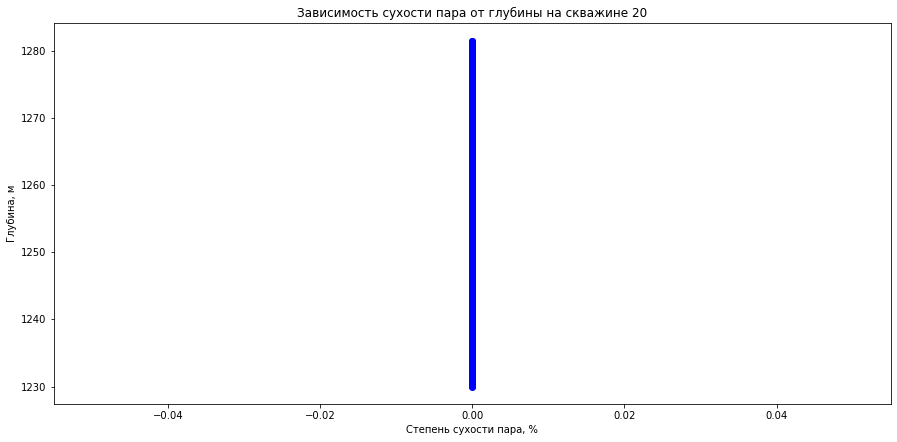

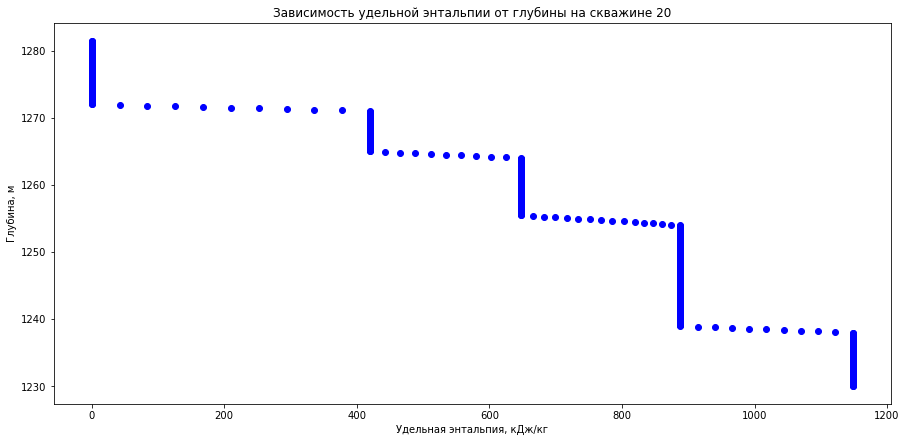

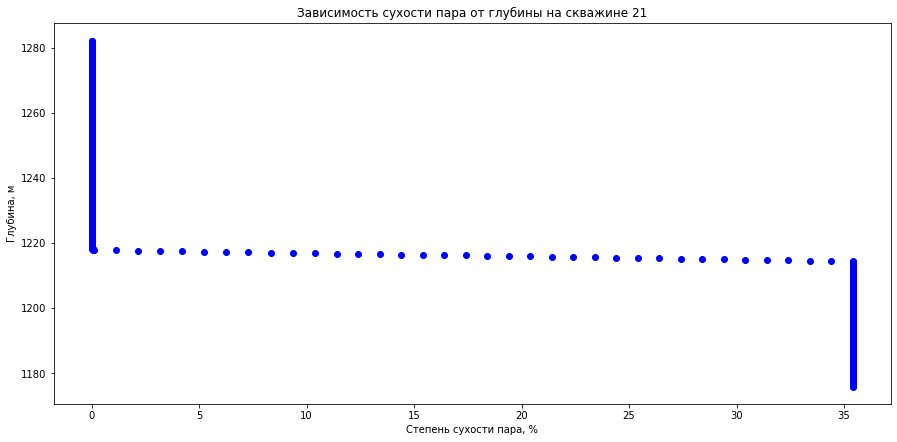

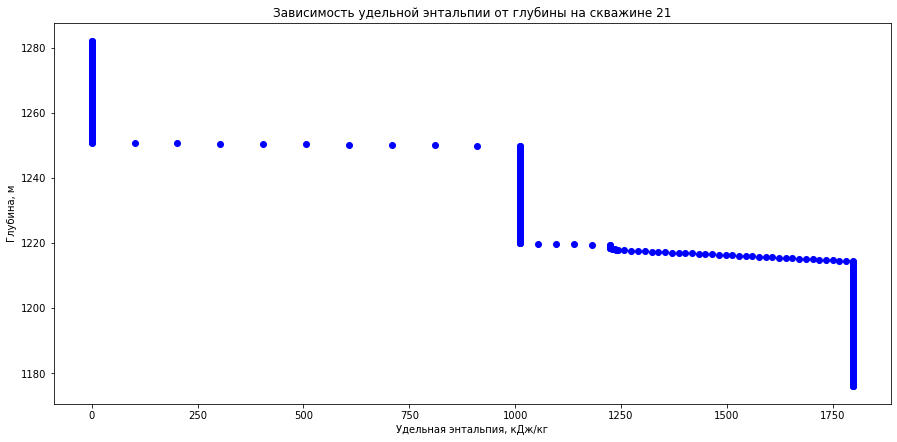

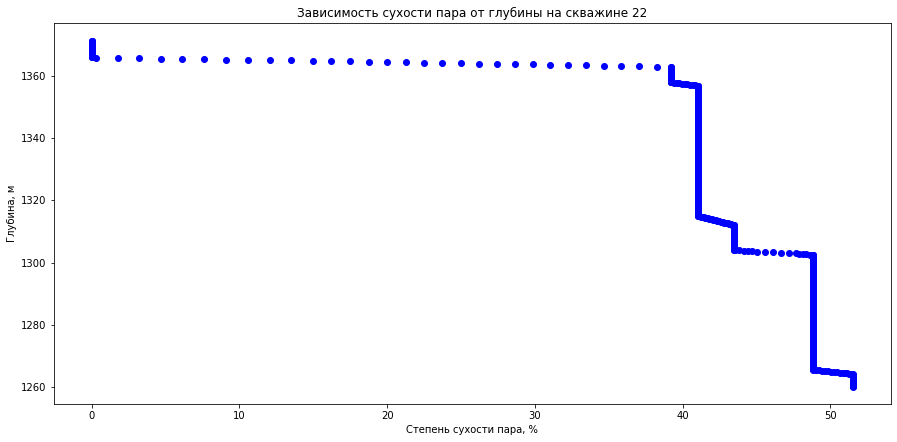

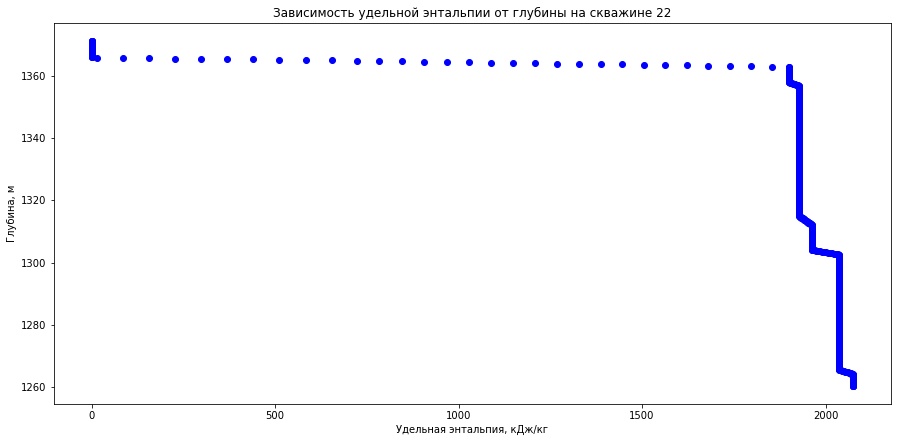

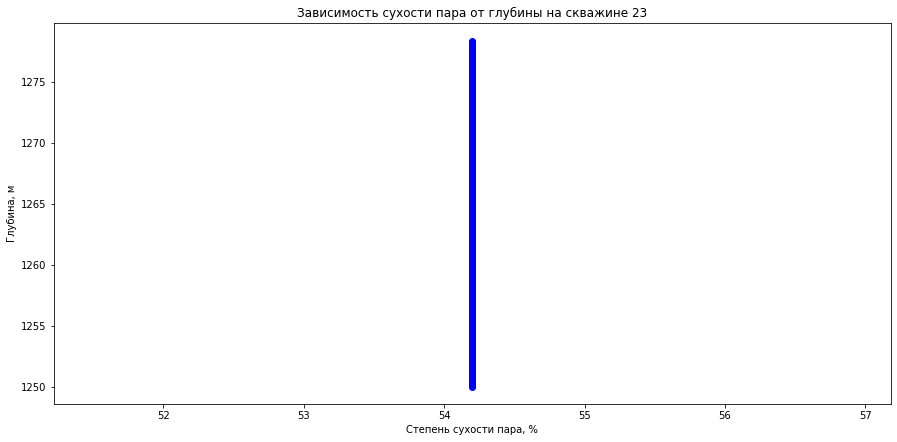

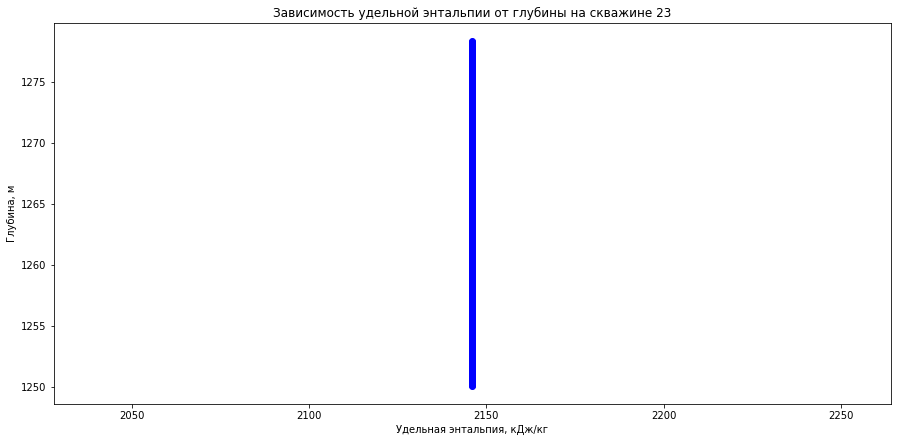

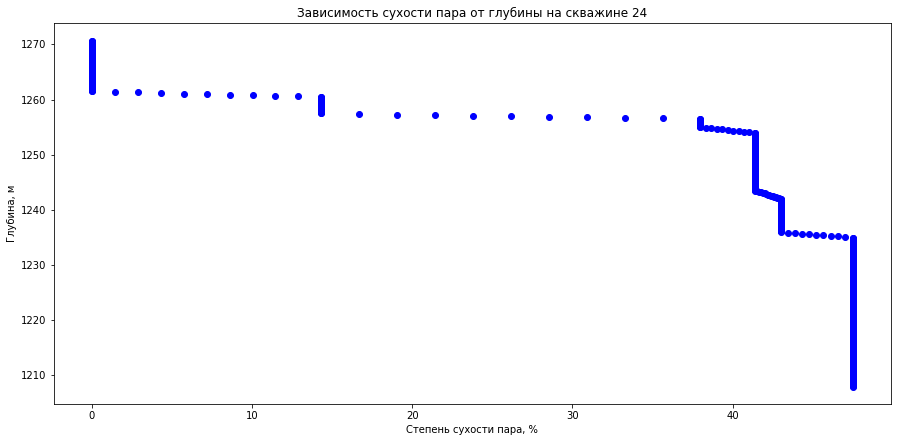

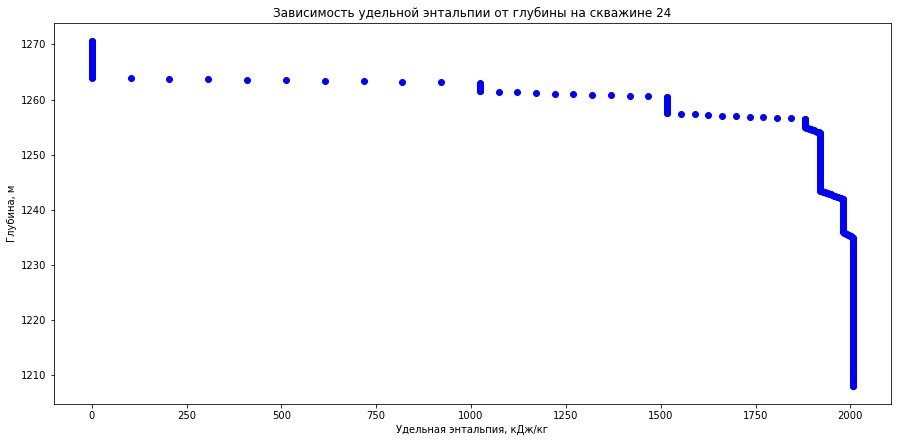

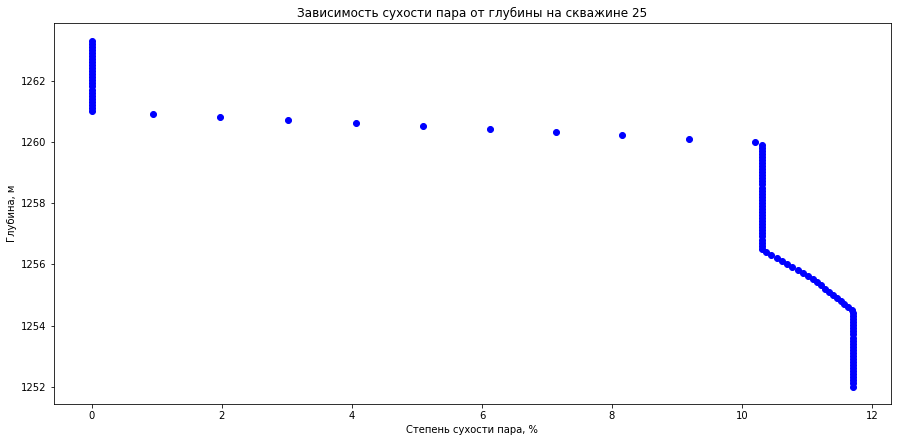

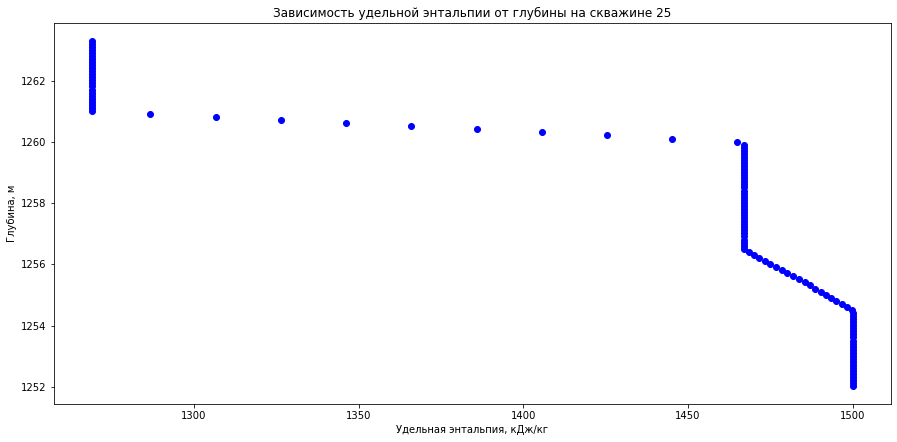

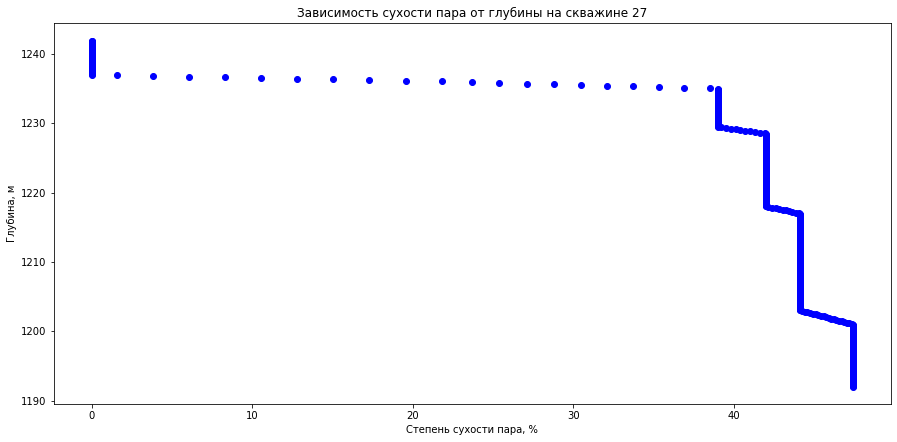

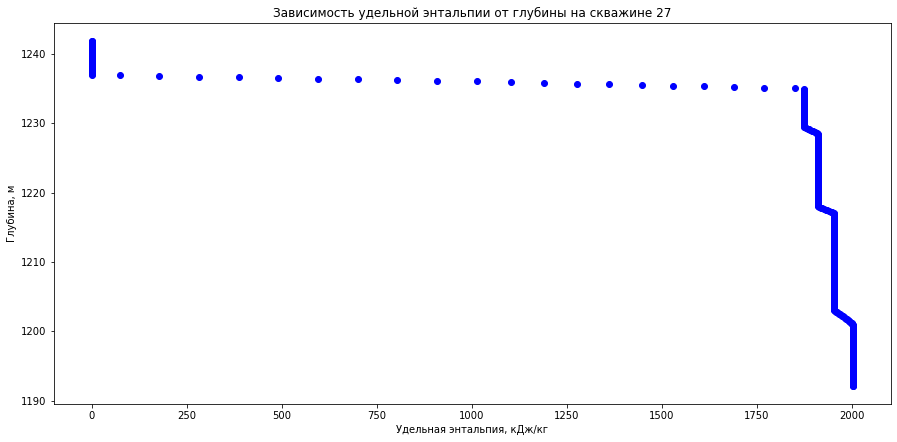

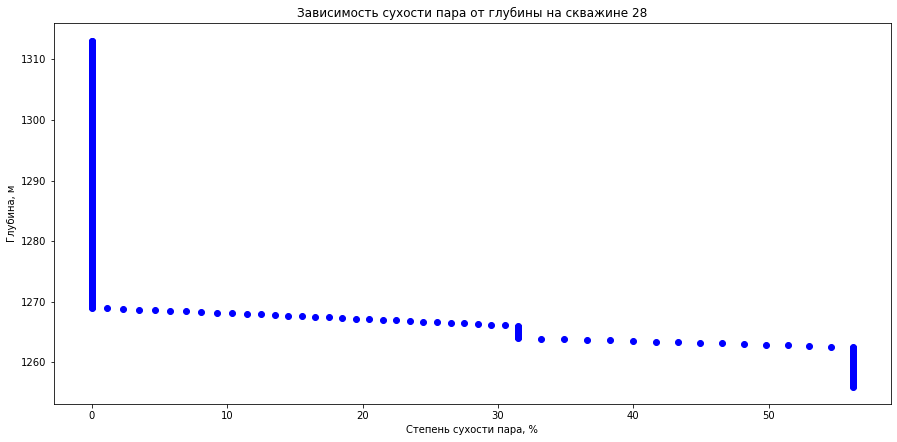

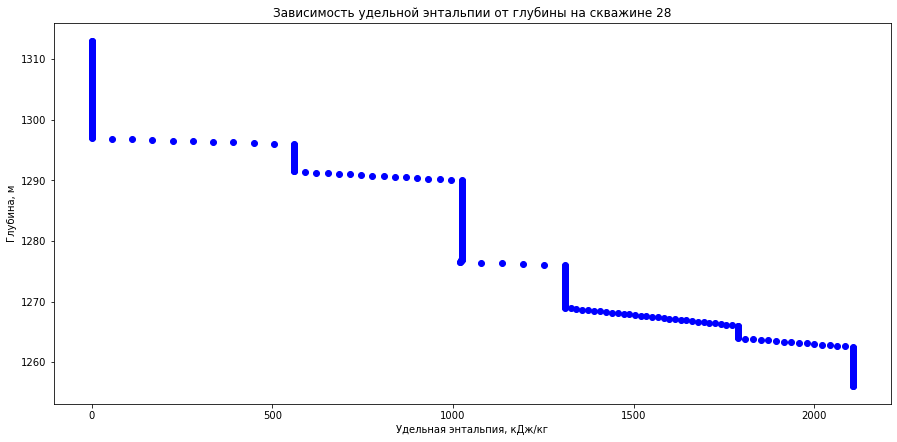

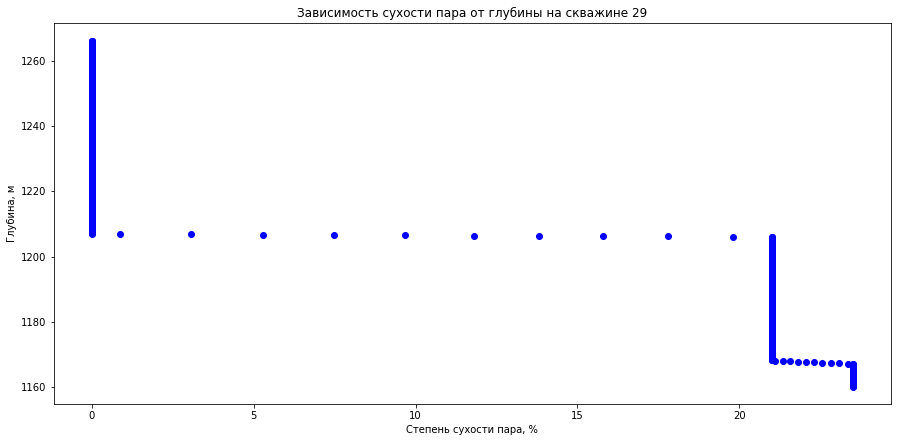

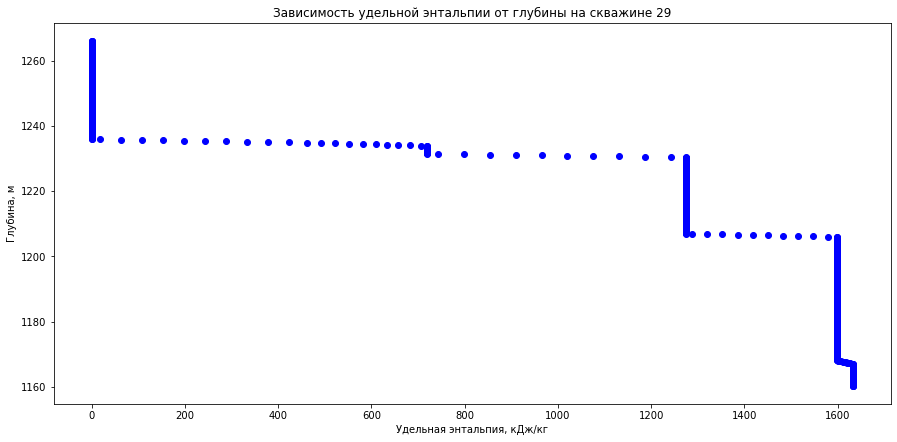

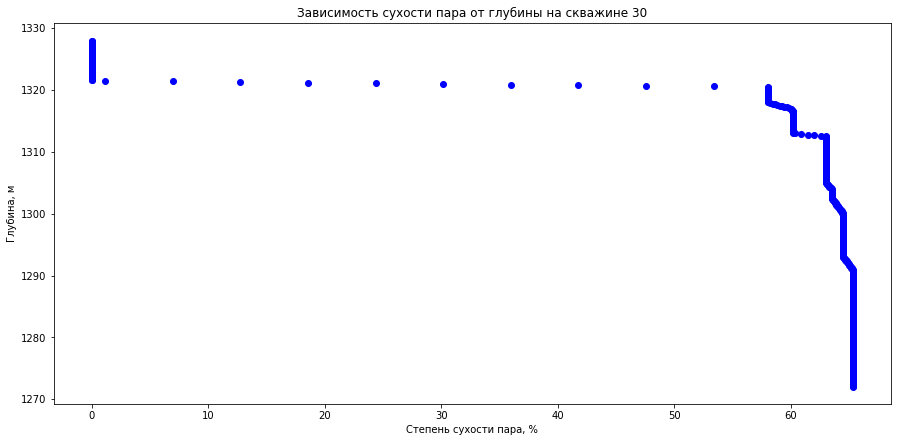

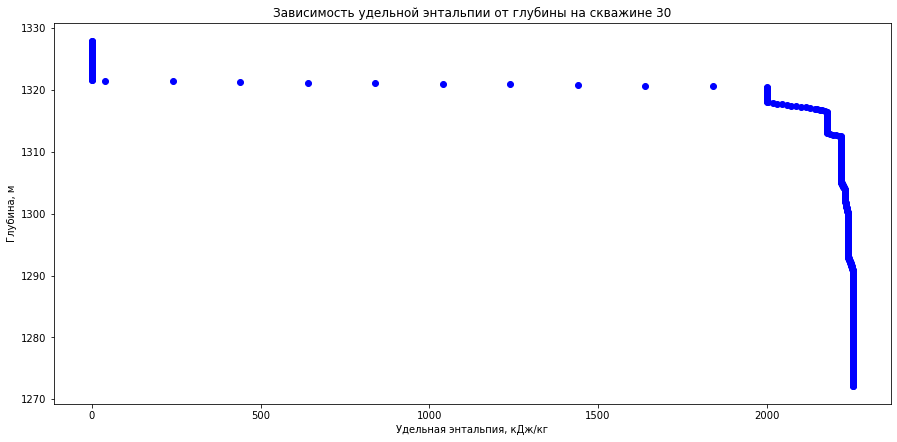

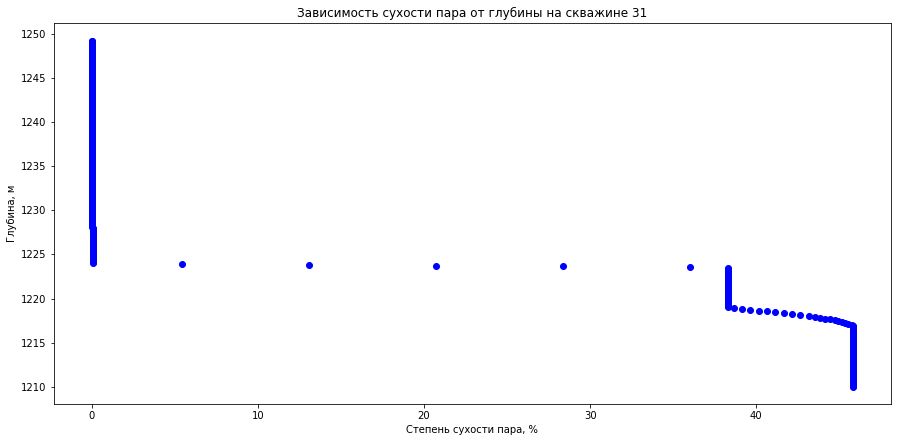

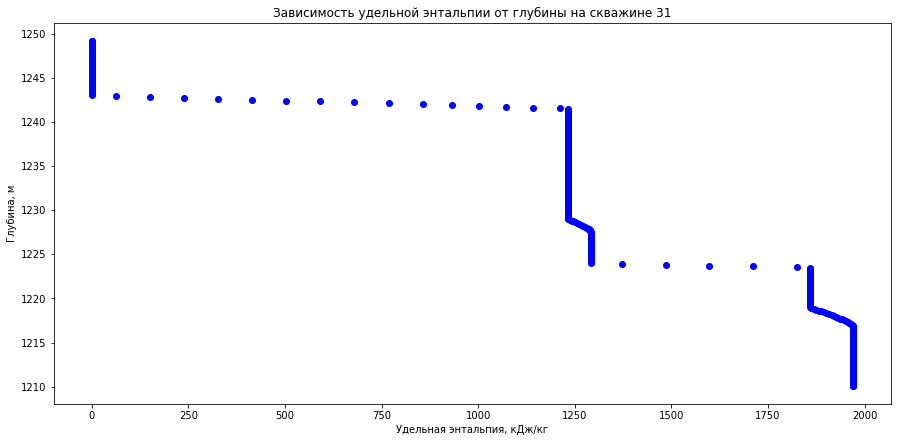

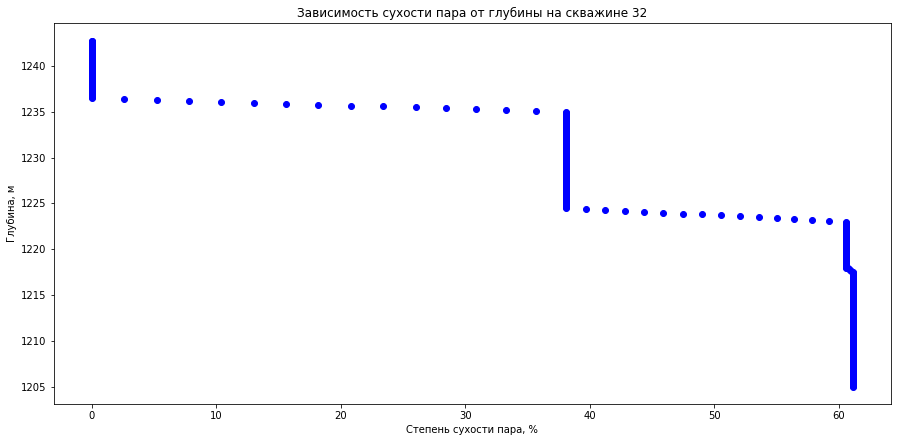

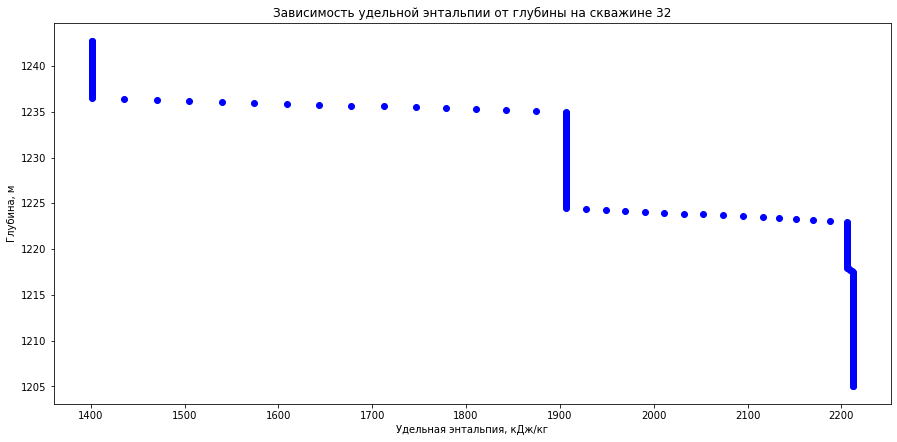

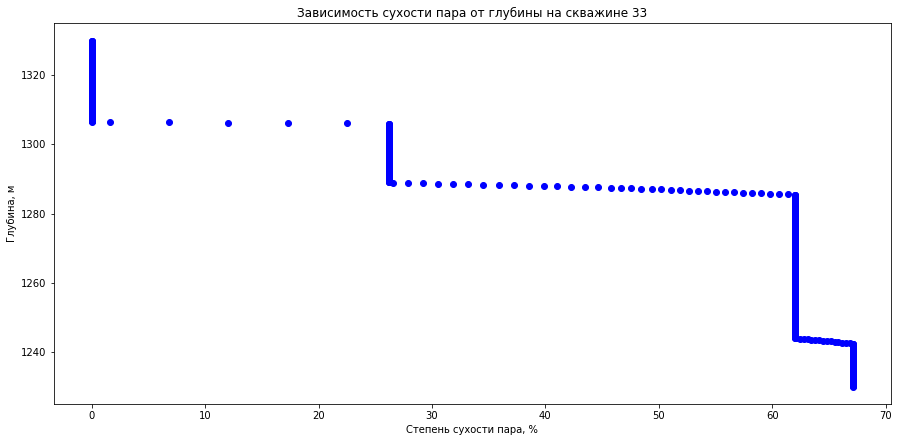

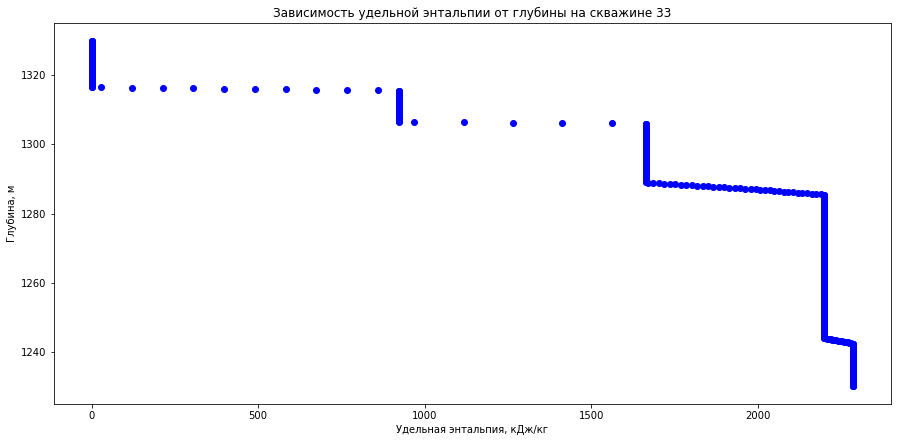

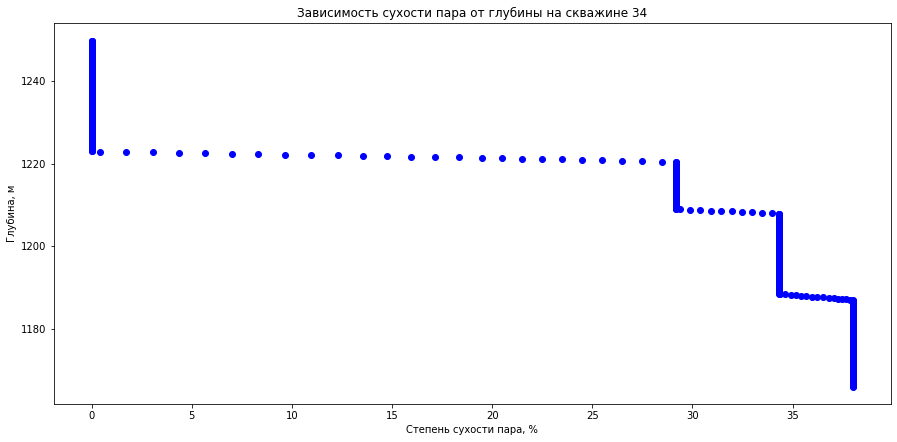

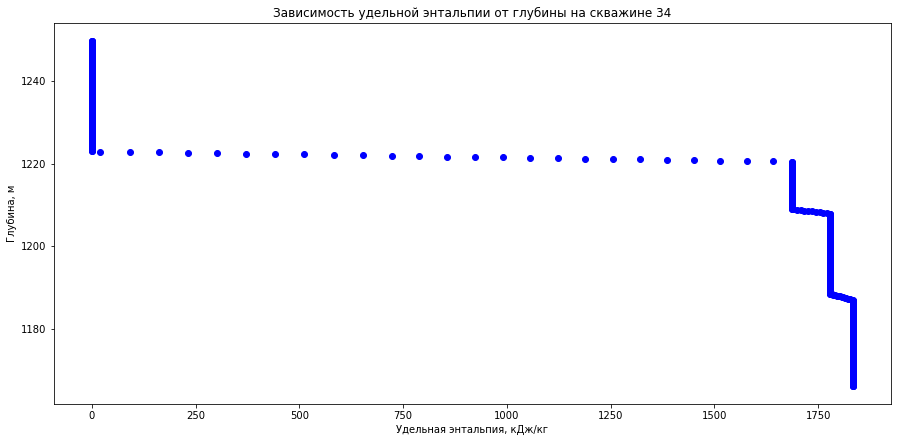

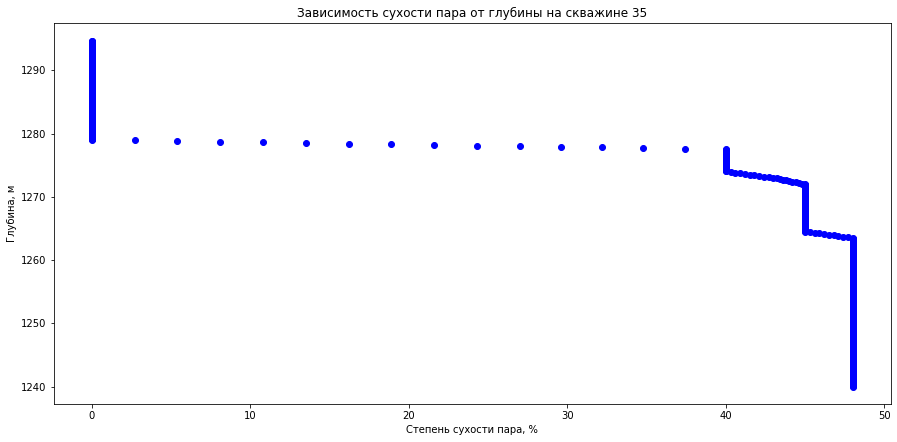

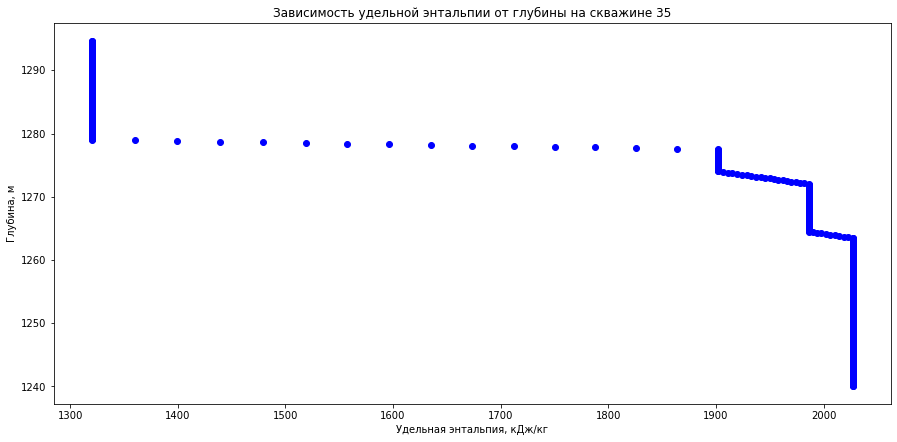

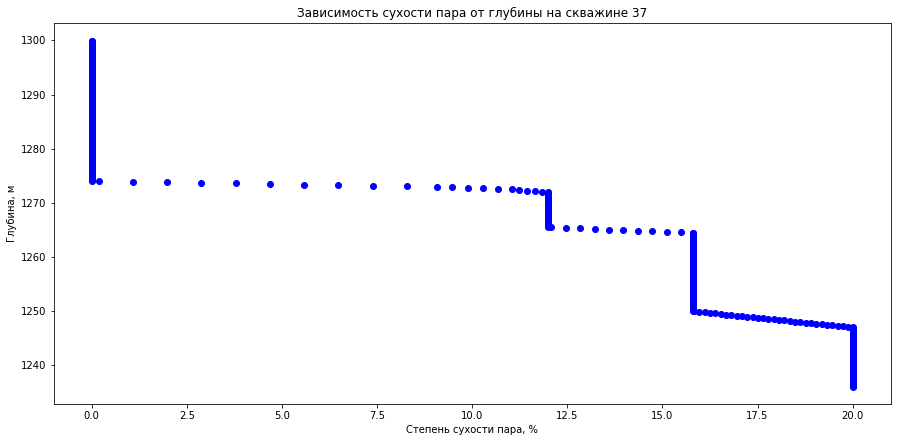

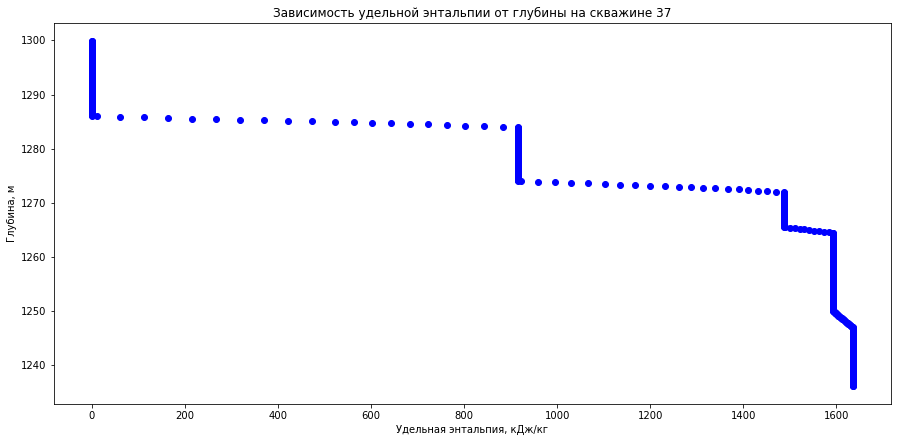

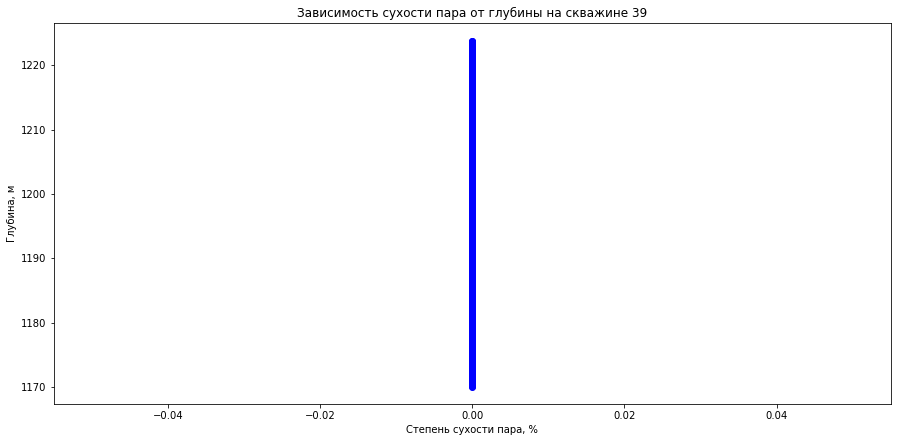

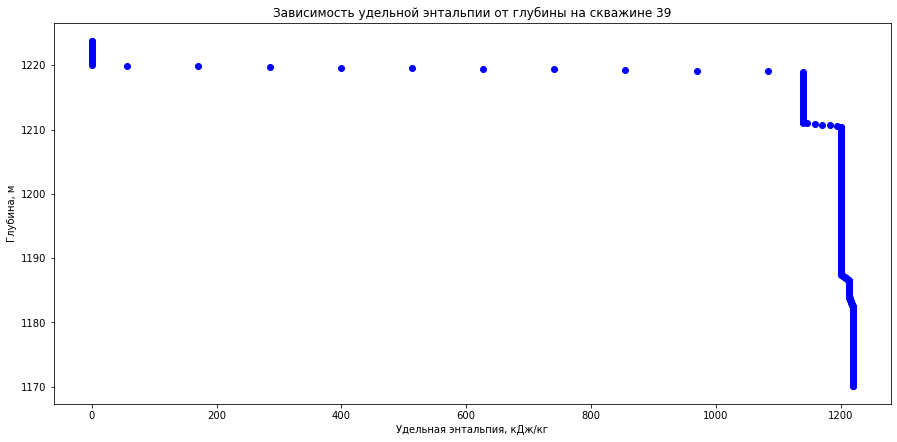

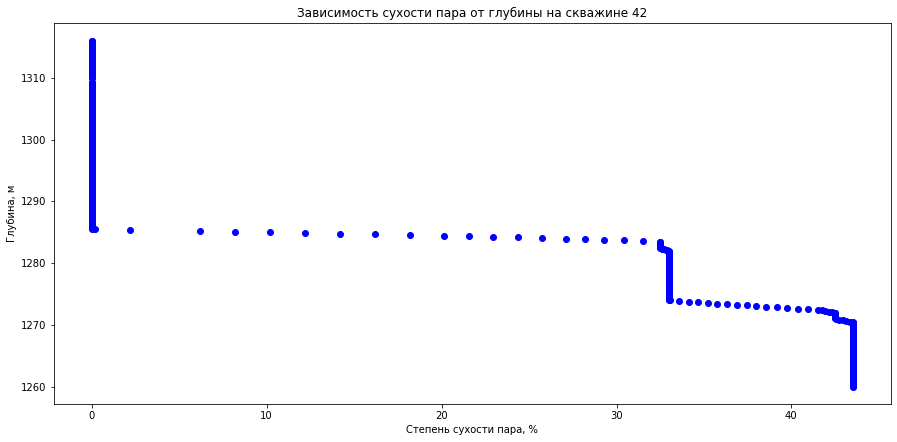

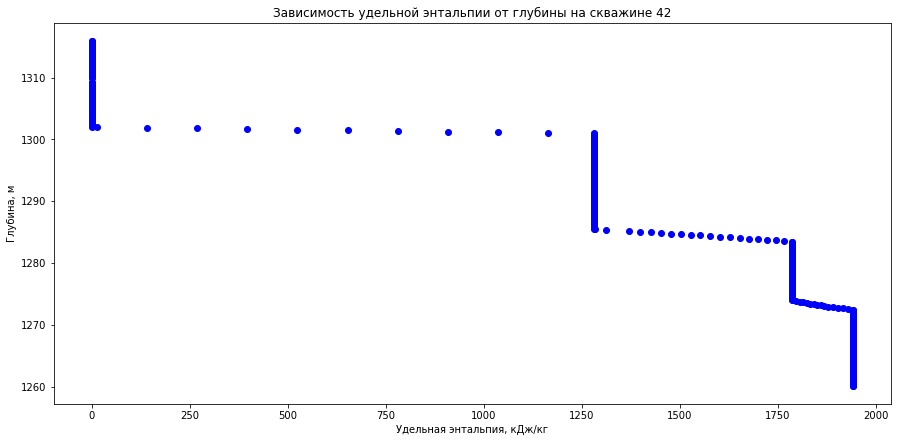

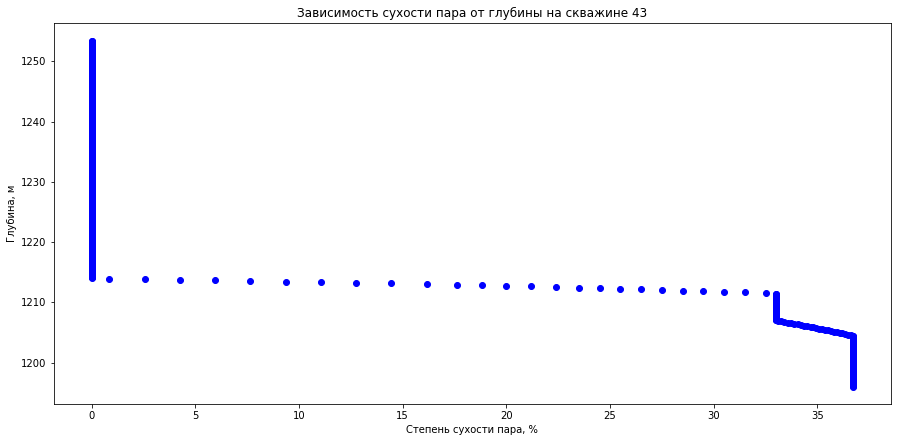

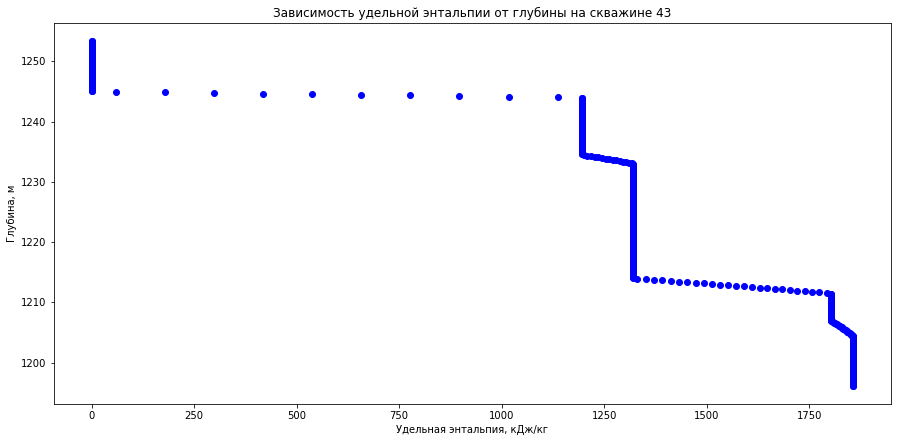

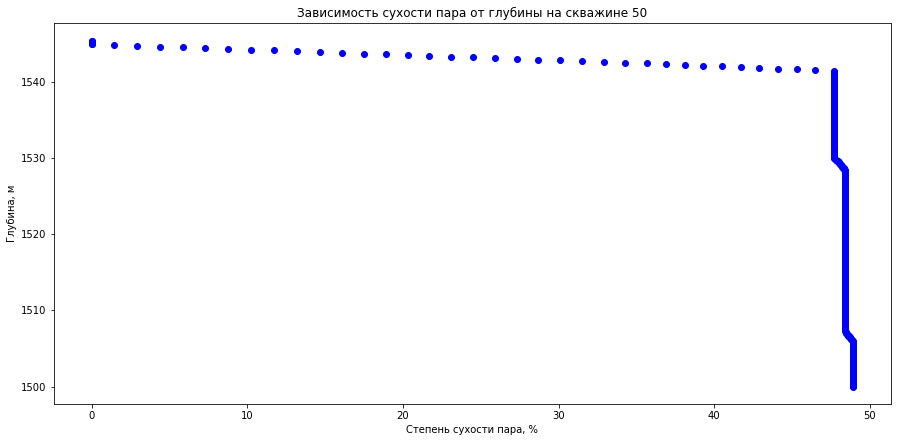

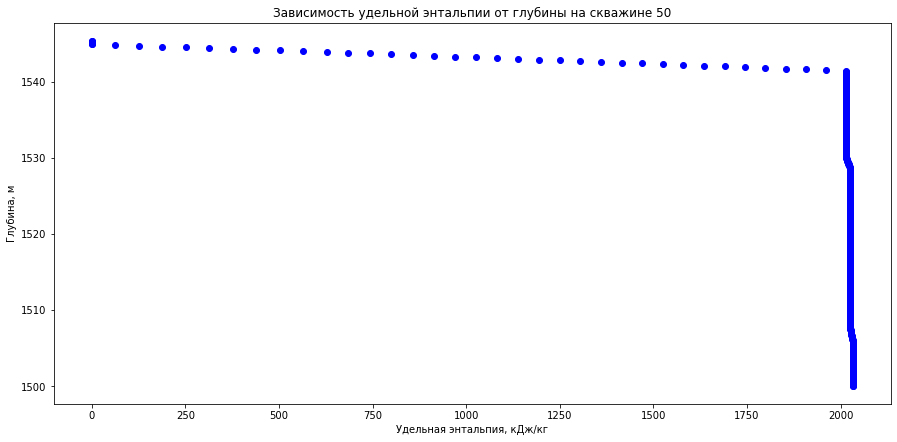

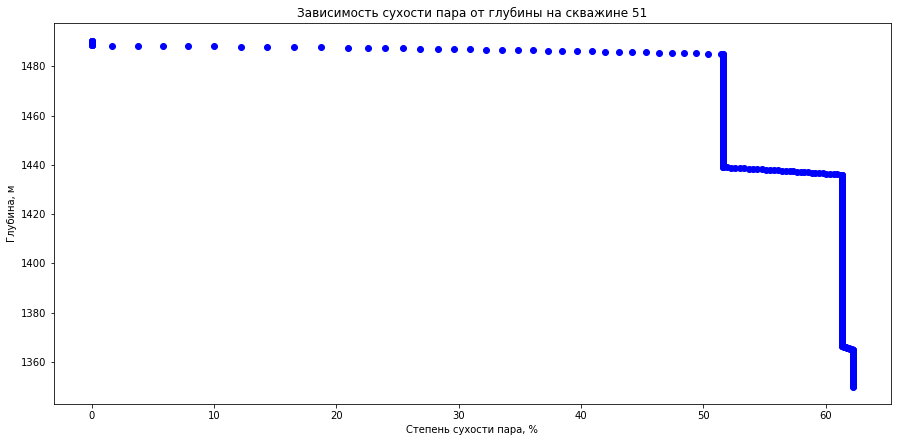

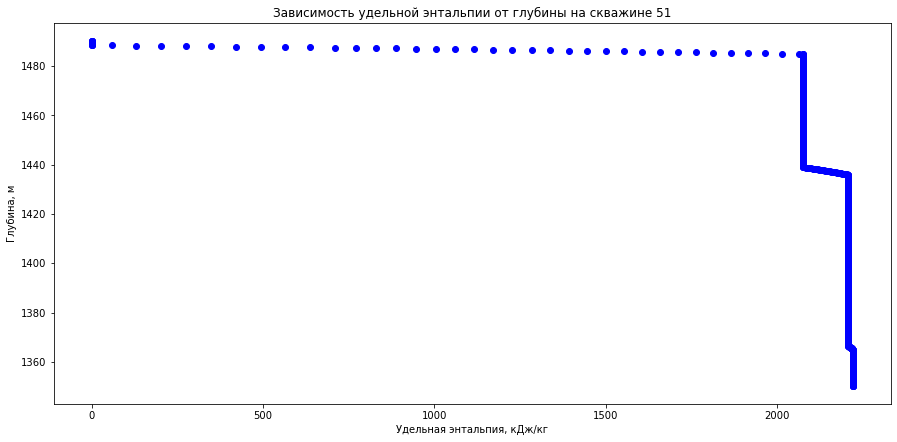

In [5]:
# Plot scatter for each pipe
list_pipes = list(data['Номер скважины'].unique())
for pipe in list_pipes:
    scatter_plot(data.loc[data['Номер скважины'] == pipe],
          'Степень сухости пара, %',
          'Глубина, м',
          'Степень сухости пара, %',
          'Глубина, м',
          'Зависимость сухости пара от глубины на скважине ' + str(pipe))
    scatter_plot(data.loc[data['Номер скважины'] == pipe],
          'Удельная энтальпия, кДж/кг',
          'Глубина, м',
          'Удельная энтальпия, кДж/кг',
          'Глубина, м',
          'Зависимость удельной энтальпии от глубины на скважине ' + str(pipe))  

### 2. Regression models

#### 2.1 Regression for both targets

In [6]:
# Regression for both targets
make_regression(data, x_columns, y_columns)

Results of sklearn.metrics:
MAE: 137.81770303851397
MSE: 66656.08627644498
RMSE: 258.17840009660955
R-Squared: 0.721276868193121


#### 2.2 Regression for each target

In [8]:
# Regression for 'Сухость пара, %'
make_regression(data, x_columns, y_1)

Results of sklearn.metrics:
MAE: 11.515025271870716
MSE: 217.78427176967708
RMSE: 14.75751577229979
R-Squared: 0.6418425369894474


In [9]:
# Regreesion for 'Удельная энтальпия'
make_regression(data, x_columns, y_2)

Results of sklearn.metrics:
MAE: 264.12038080515737
MSE: 133094.38828112042
RMSE: 364.82103596300533
R-Squared: 0.8007111993967779
